In [1]:
#pip install h2o

In [2]:
# Standard Library 
import pandas as pd
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:


import h2o
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator
h2o.init()  #  function to initialize H2O

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.66-b18, mixed mode)
  Starting server from D:\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Home-PC\AppData\Local\Temp\tmprqcd5nwm
  JVM stdout: C:\Users\Home-PC\AppData\Local\Temp\tmprqcd5nwm\h2o_Home_PC_started_from_python.out
  JVM stderr: C:\Users\Home-PC\AppData\Local\Temp\tmprqcd5nwm\h2o_Home_PC_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.3
H2O_cluster_version_age:,1 month and 14 days
H2O_cluster_name:,H2O_from_python_Home_PC_rsfw9l
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.539 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


In [4]:
# Data read - All Required data  are in datafolder
data_folder = "F:/BitsCourse/CapStoneProject/Retail_Customer_Analytics/2019AIML012"
train_data = h2o.import_file(data_folder+"/input_files/3-GR-29-Capstone_Customer_Retail_Analytics_H2o_trainData.csv")
train_data.shape

Parse progress: |█████████████████████████████████████████████████████████| 100%


(2793, 8)

In [5]:
train_data

Recency,Frequency,Monetary,RecencyCluster,FrequencyCluster,MonetaryCluster,ClusterScore,LTVCluster_binary
158,23,462.95,1,0,0,1,0
66,35,709.82,2,0,0,2,0
3,85,10859.5,3,1,1,5,1
172,58,360.81,1,0,0,1,0
68,22,514.08,2,0,0,2,0
3,22,375,3,0,0,3,0
181,91,590.54,0,1,0,1,0
234,7,106.4,0,0,0,0,0
203,3,876,0,0,0,0,0
105,30,176.61,1,0,0,1,0


In [6]:
train_data.types

{'Recency': 'int',
 'Frequency': 'int',
 'Monetary': 'real',
 'RecencyCluster': 'int',
 'FrequencyCluster': 'int',
 'MonetaryCluster': 'int',
 'ClusterScore': 'int',
 'LTVCluster_binary': 'int'}

In [7]:
predictors_data = ['Recency', 
                   'RecencyCluster',
                   'Frequency', 
                   'FrequencyCluster', 
                   'Monetary', 
                   'MonetaryCluster', 
                   'ClusterScore'
                  ]
response_data = 'LTVCluster_binary'


# convert respose columncolumns to factors
train_data["LTVCluster_binary"] = train_data["LTVCluster_binary"].asfactor()

train_data["RecencyCluster"] = train_data["RecencyCluster"].asfactor()
train_data["FrequencyCluster"] = train_data["FrequencyCluster"].asfactor()
train_data["MonetaryCluster"] = train_data["MonetaryCluster"].asfactor()
# train_data["Segment"] =        train_data["Segment"].asfactor()

train_data.types

{'Recency': 'int',
 'Frequency': 'int',
 'Monetary': 'real',
 'RecencyCluster': 'enum',
 'FrequencyCluster': 'enum',
 'MonetaryCluster': 'enum',
 'ClusterScore': 'int',
 'LTVCluster_binary': 'enum'}

In [8]:
# Read Test data 


valid_data = h2o.import_file(data_folder+"/input_files/3-GR-29-Capstone_Customer_Retail_Analytics_H2o_testData.csv")
valid_data

Parse progress: |█████████████████████████████████████████████████████████| 100%


CustomerID,Recency,Frequency,Monetary,RecencyCluster,FrequencyCluster,MonetaryCluster,ClusterScore,LTVCluster_binary
13167,13,13,242.91,3,0,0,3,0
14732,13,94,1618.3,3,1,0,4,0
15182,24,29,622.85,3,0,0,3,0
15301,17,145,3223.96,3,1,0,4,1
17652,14,155,2713.57,3,1,0,4,1
16517,147,17,162.7,1,0,0,1,0
14506,31,99,818.96,3,1,0,4,1
14146,124,65,1903.73,1,0,0,1,1
16200,34,58,550.57,3,0,0,3,0
16315,200,14,226.37,0,0,0,0,0


In [9]:
valid_data["LTVCluster_binary"] = valid_data["LTVCluster_binary"].asfactor()

valid_data["RecencyCluster"] = valid_data["RecencyCluster"].asfactor()
valid_data["FrequencyCluster"] = valid_data["FrequencyCluster"].asfactor()
valid_data["MonetaryCluster"] = valid_data["MonetaryCluster"].asfactor()
# valid_data["Segment"] =        valid_data["Segment"].asfactor()


In [10]:
#Get CustomerID of test data
CustomerIDTest = pd.read_csv(data_folder+"/input_files/3-GR-29-Capstone_Customer_Retail_Analytics_H2o_CustomerIDTest.csv")
H2O_Model_Data = {}
Model_accuracy = {}
# Store custmerid and Actual class i.e LTVCluster
H2O_Model_Data ["CustomerID"] = CustomerIDTest["CustomerID"].values
H2O_Model_Data["LTVCluster_binary"] = valid_data["LTVCluster_binary"].as_data_frame().values


## H2O AutoML

In [11]:
from h2o.automl import H2OAutoML

In [12]:
aml = H2OAutoML( max_models=20 ,
                 max_runtime_secs = 5*60,
                seed = 2018) # Run AutoML for 10 base models (limited to 300 sec max runtime)
aml.train(x = predictors_data, y=response_data,  training_frame = train_data)
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

AutoML progress: |
17:13:31.625: AutoML: XGBoost is not available; skipping it.

█
17:13:35.122: GLM_1_AutoML_20201111_171331 [GLM def_1] failed: java.lang.ArrayIndexOutOfBoundsException: 16

███████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20201111_171331,0.894358,0.393932,0.843538,0.177035,0.350001,0.1225
StackedEnsemble_BestOfFamily_AutoML_20201111_171331,0.894035,0.394005,0.844328,0.17531,0.349969,0.122478
DRF_1_AutoML_20201111_171331,0.89316,0.407029,0.84343,0.179233,0.351382,0.12347
XRT_1_AutoML_20201111_171331,0.891996,0.39778,0.844177,0.176558,0.352025,0.123922
GBM_4_AutoML_20201111_171331,0.884231,0.410889,0.832053,0.185722,0.359388,0.12916
GBM_1_AutoML_20201111_171331,0.884219,0.40785,0.833398,0.19021,0.358378,0.128435
GBM_3_AutoML_20201111_171331,0.883245,0.410628,0.831525,0.187154,0.359821,0.129471
GBM_2_AutoML_20201111_171331,0.882164,0.411655,0.832131,0.192967,0.360606,0.130037
GBM_grid__1_AutoML_20201111_171331_model_4,0.881507,0.413299,0.831157,0.196429,0.361759,0.13087
GBM_grid__1_AutoML_20201111_171331_model_5,0.872538,0.426851,0.81868,0.206337,0.368584,0.135854


In [13]:
def get_h20_model_report(model, valid, model_name):    
    # retrieve the model performance
    perf = model.model_performance(valid)
    print (perf)
    Model_accuracy[model_name] = perf.auc()
#     perf.pr_auc()# build the variable importances plot:
    perf.aucpr()# build the variable importances plot:
    #print(model.varimp_plot())

    # build the roc curve:
    perf.plot(type = "roc")


In [14]:
y_pred = aml.predict(valid_data)

stackedensemble prediction progress: |████████████████████████████████████| 100%


In [15]:
y_pred

predict,p0,p1
0,0.874602,0.125398
1,0.701145,0.298855
0,0.850948,0.149052
1,0.193023,0.806977
1,0.185107,0.814893
0,0.936832,0.0631683
0,0.885715,0.114285
1,0.496692,0.503308
0,0.896723,0.103277
0,0.939443,0.0605571


In [16]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
best_model = h2o.get_model(model_ids[0])
best_model

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_AutoML_20201111_171331

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.037120771860626345
RMSE: 0.19266751636076682
LogLoss: 0.16900911318857673
Null degrees of freedom: 2792
Residual degrees of freedom: 2788
Null deviance: 3695.108914299636
Residual deviance: 944.0849062713896
AIC: 954.0849062713896
AUC: 0.9966524658354038
AUCPR: 0.9944151076401467
Gini: 0.9933049316708076

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.38699809715269323: 


,,0,1,Error,Rate
0,0,1678.0,68.0,0.0389,(68.0/1746.0)
1,1,20.0,1027.0,0.0191,(20.0/1047.0)
2,Total,1698.0,1095.0,0.0315,(88.0/2793.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.386998,0.958917,232.0
1,max f2,0.329188,0.977486,249.0
2,max f0point5,0.529706,0.964649,188.0
3,max accuracy,0.386998,0.968493,232.0
4,max precision,0.949430,1.000000,0.0
5,max recall,0.247314,1.000000,274.0
6,max specificity,0.949430,1.000000,0.0
7,max absolute_mcc,0.386998,0.934003,232.0
8,max min_per_class_accuracy,0.426721,0.966208,220.0
9,max mean_per_class_accuracy,0.373951,0.971359,236.0



Gains/Lift Table: Avg response rate: 37.49 %, avg score: 37.62 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010025,0.949041,2.667622,2.667622,1.000000,0.949430,1.000000,0.949430,0.026743,0.026743,166.762178,166.762178,0.026743
1,2,0.020050,0.948511,2.667622,2.667622,1.000000,0.948730,1.000000,0.949080,0.026743,0.053486,166.762178,166.762178,0.053486
2,3,0.030075,0.948027,2.667622,2.667622,1.000000,0.948286,1.000000,0.948816,0.026743,0.080229,166.762178,166.762178,0.080229
3,4,0.040100,0.945932,2.667622,2.667622,1.000000,0.947034,1.000000,0.948370,0.026743,0.106972,166.762178,166.762178,0.106972
4,5,0.050125,0.943629,2.667622,2.667622,1.000000,0.945300,1.000000,0.947756,0.026743,0.133715,166.762178,166.762178,0.133715
5,6,0.100251,0.921525,2.667622,2.667622,1.000000,0.933306,1.000000,0.940531,0.133715,0.267431,166.762178,166.762178,0.267431
6,7,0.150018,0.899563,2.667622,2.667622,1.000000,0.911359,1.000000,0.930854,0.132760,0.400191,166.762178,166.762178,0.400191
7,8,0.200143,0.869949,2.667622,2.667622,1.000000,0.886690,1.000000,0.919793,0.133715,0.533906,166.762178,166.762178,0.533906
8,9,0.300036,0.697243,2.638938,2.658072,0.989247,0.799097,0.996420,0.879609,0.263610,0.797517,163.893767,165.807182,0.795799
9,10,0.399928,0.360019,1.902712,2.469401,0.713262,0.534706,0.925694,0.793460,0.190067,0.987584,90.271231,146.940100,0.940046




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.12250040454207882
RMSE: 0.35000057791677835
LogLoss: 0.3939319715609212
Null degrees of freedom: 2792
Residual degrees of freedom: 2788
Null deviance: 3696.7195542704744
Residual deviance: 2200.5039931393057
AIC: 2210.5039931393057
AUC: 0.8943580688182348
AUCPR: 0.8435381507105609
Gini: 0.7887161376364695

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.36555404320497065: 


,,0,1,Error,Rate
0,0,1488.0,258.0,0.1478,(258.0/1746.0)
1,1,216.0,831.0,0.2063,(216.0/1047.0)
2,Total,1704.0,1089.0,0.1697,(474.0/2793.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.365554,0.778090,220.0
1,max f2,0.128813,0.833476,325.0
2,max f0point5,0.647295,0.799347,133.0
3,max accuracy,0.451880,0.834586,195.0
4,max precision,0.940635,0.986111,10.0
5,max recall,0.049731,1.000000,399.0
6,max specificity,0.951466,0.999427,0.0
7,max absolute_mcc,0.451880,0.644341,195.0
8,max min_per_class_accuracy,0.307007,0.819484,239.0
9,max mean_per_class_accuracy,0.288369,0.823836,247.0



Gains/Lift Table: Avg response rate: 37.49 %, avg score: 37.49 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010025,0.950466,2.477077,2.477077,0.928571,0.951152,0.928571,0.951152,0.024833,0.024833,147.707736,147.707736,0.023687
1,2,0.020050,0.947511,2.667622,2.572350,1.000000,0.949091,0.964286,0.950122,0.026743,0.051576,166.762178,157.234957,0.050430
2,3,0.030075,0.944518,2.667622,2.604107,1.000000,0.945744,0.976190,0.948662,0.026743,0.078319,166.762178,160.410697,0.077174
3,4,0.040100,0.942800,2.667622,2.619986,1.000000,0.943971,0.982143,0.947489,0.026743,0.105062,166.762178,161.998567,0.103917
4,5,0.050125,0.940468,2.667622,2.629513,1.000000,0.941468,0.985714,0.946285,0.026743,0.131805,166.762178,162.951289,0.130660
5,6,0.100251,0.911880,2.362751,2.496132,0.885714,0.927513,0.935714,0.936899,0.118434,0.250239,136.275072,149.613181,0.239929
6,7,0.150018,0.874443,2.360557,2.451156,0.884892,0.894674,0.918854,0.922891,0.117479,0.367717,136.055740,145.115605,0.348244
7,8,0.200143,0.823124,2.172206,2.381294,0.814286,0.849845,0.892665,0.904597,0.108883,0.476600,117.220630,138.129386,0.442236
8,9,0.300036,0.615909,1.902712,2.221957,0.713262,0.732993,0.832936,0.847464,0.190067,0.666667,90.271231,122.195704,0.586483
9,10,0.399928,0.341360,1.348153,2.003702,0.505376,0.473600,0.751119,0.754082,0.134670,0.801337,34.815294,100.370159,0.642116


### H2O other models
#####   H2ORandomForestEstimator
#####   H2OGradientBoostingEstimator
#####   H2OStackedEnsembleEstimator

In [17]:
def predict_with_H2OStackedEnsemble(predictors, response, train, valid, baseModels):
    """
    This method creates a model using H2OStackedEnsembleEstimator and predicts the output
    predictors: The predictors used to predict
    response: The label of training data set
    train: The training set
    valid: The validation set
    """
    
    model_stack = H2OStackedEnsembleEstimator(model_id="ensemble",
                                    training_frame=train,
                                    validation_frame=valid,
                                    base_models=baseModels)
    model_stack.train(x = predictors, y = response, training_frame=train, validation_frame=valid)
    
    # get model report
    get_h20_model_report(model_stack, valid, "H2OStackedEnsembleEstimator")
    # Predict using the GBM model and the testing dataset
    predict = model_stack.predict(valid)
    return model_stack, predict

def predict_with_H2ORandomForest(predictors, response, train, valid):
    """
    This method creates a model using H2ORandomForest Estimator and predicts the output
    predictors: The predictors used to predict
    response: The label of training data set
    train: The training set
    valid: The validation set
    """
    
    model_rf = H2ORandomForestEstimator(ntrees=50, max_depth=20, nfolds=5, fold_assignment="Modulo",
                                        keep_cross_validation_predictions=True, seed = 1)
    model_rf.train(   x = predictors,
                       y = response,
                       training_frame = train,
                       validation_frame = valid)
    
    # get model report
    get_h20_model_report(model_rf, valid, "H2ORandomForestEstimator")
    # Predict using the GBM model and the testing dataset
    predict = model_rf.predict(valid)
    return model_rf, predict

def predict_with_H2OGradientBoosting(predictors, response, train, valid):
    """
    This method creates a model using H2OGradientBoosting Estimator and predicts the output
    predictors: The predictors used to predict
    response: The label of training data set
    train: The training set
    valid: The validation set
    """
    
    model_gbm = H2OGradientBoostingEstimator(nfolds= 5, fold_assignment="Modulo",
                                             keep_cross_validation_predictions=True, seed = 1)
    model_gbm.train(   x = predictors,
                       y = response,
                       training_frame = train,
                       validation_frame = valid)
    
    # get model report
    get_h20_model_report(model_gbm, valid, "H2OGradientBoostingEstimator")
    # Predict using the GBM model and the testing dataset
    predict = model_gbm.predict(valid)
    return model_gbm, predict


gbm Model Build progress: |███████████████████████████████████████████████| 100%

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.13209824624803848
RMSE: 0.36345322429170784
LogLoss: 0.4179590317817292
Mean Per-Class Error: 0.25607668606641565
AUC: 0.8283392493558442
AUCPR: 0.6776502063317246
Gini: 0.6566784987116885

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.59623903560056: 


,,0,1,Error,Rate
0,0,399.0,38.0,0.087,(38.0/437.0)
1,1,54.0,73.0,0.4252,(54.0/127.0)
2,Total,453.0,111.0,0.1631,(92.0/564.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.596239,0.613445,90.0
1,max f2,0.177410,0.710723,241.0
2,max f0point5,0.801764,0.708447,45.0
3,max accuracy,0.777200,0.854610,53.0
4,max precision,0.975708,1.000000,0.0
5,max recall,0.020864,1.000000,393.0
6,max specificity,0.975708,1.000000,0.0
7,max absolute_mcc,0.777200,0.537115,53.0
8,max min_per_class_accuracy,0.294111,0.740157,171.0
9,max mean_per_class_accuracy,0.596239,0.743923,90.0



Gains/Lift Table: Avg response rate: 22.52 %, avg score: 30.22 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010638,0.970132,4.440945,4.440945,1.000000,0.973642,1.000000,0.973642,0.047244,0.047244,344.094488,344.094488,0.047244
1,2,0.021277,0.966603,4.440945,4.440945,1.000000,0.967977,1.000000,0.970810,0.047244,0.094488,344.094488,344.094488,0.094488
2,3,0.030142,0.956556,3.552756,4.179713,0.800000,0.964429,0.941176,0.968933,0.031496,0.125984,255.275591,317.971283,0.123696
3,4,0.040780,0.951381,3.700787,4.054776,0.833333,0.953537,0.913043,0.964917,0.039370,0.165354,270.078740,305.477576,0.160778
4,5,0.051418,0.931153,3.700787,3.981537,0.833333,0.942352,0.896552,0.960248,0.039370,0.204724,270.078740,298.153679,0.197859
5,6,0.101064,0.808450,3.647919,3.817654,0.821429,0.872873,0.859649,0.917327,0.181102,0.385827,264.791901,281.765437,0.367520
6,7,0.150709,0.689605,1.903262,3.187031,0.428571,0.757498,0.717647,0.864677,0.094488,0.480315,90.326209,218.703103,0.425395
7,8,0.200355,0.591935,1.903262,2.868929,0.428571,0.634634,0.646018,0.807675,0.094488,0.574803,90.326209,186.892899,0.483270
8,9,0.299645,0.360747,0.872328,2.207334,0.196429,0.459296,0.497041,0.692236,0.086614,0.661417,-12.767154,120.733355,0.466909
9,10,0.400709,0.258422,1.012847,1.906069,0.228070,0.308198,0.429204,0.595377,0.102362,0.763780,1.284708,90.606926,0.468585


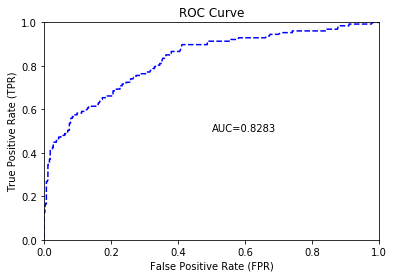

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [18]:
gbm_model, gbm_predict = predict_with_H2OGradientBoosting(predictors_data, response_data, train_data, valid_data)

drf Model Build progress: |███████████████████████████████████████████████| 100%

ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.13736536164117552
RMSE: 0.3706283335650089
LogLoss: 0.4428952499565742
Mean Per-Class Error: 0.2417791311555164
AUC: 0.8210688480873529
AUCPR: 0.6116752883497336
Gini: 0.6421376961747058

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.381818533539772: 


,,0,1,Error,Rate
0,0,364.0,73.0,0.167,(73.0/437.0)
1,1,41.0,86.0,0.3228,(41.0/127.0)
2,Total,405.0,159.0,0.2021,(114.0/564.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.381819,0.601399,134.0
1,max f2,0.176545,0.688360,236.0
2,max f0point5,0.740516,0.639386,53.0
3,max accuracy,0.740516,0.835106,53.0
4,max precision,0.948777,0.925926,16.0
5,max recall,0.027740,1.000000,376.0
6,max specificity,0.999489,0.997712,0.0
7,max absolute_mcc,0.381819,0.473573,134.0
8,max min_per_class_accuracy,0.278791,0.736842,172.0
9,max mean_per_class_accuracy,0.357781,0.758221,145.0



Gains/Lift Table: Avg response rate: 22.52 %, avg score: 29.34 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010638,0.998621,2.960630,2.960630,0.666667,0.999371,0.666667,0.999371,0.031496,0.031496,196.062992,196.062992,0.026919
1,2,0.021277,0.997842,4.440945,3.700787,1.000000,0.998279,0.833333,0.998825,0.047244,0.078740,344.094488,270.078740,0.074163
2,3,0.030142,0.973568,4.440945,3.918481,1.000000,0.992501,0.882353,0.996965,0.039370,0.118110,344.094488,291.848078,0.113534
3,4,0.040780,0.959752,4.440945,4.054776,1.000000,0.968222,0.913043,0.989467,0.047244,0.165354,344.094488,305.477576,0.160778
4,5,0.051418,0.940237,2.960630,3.828401,0.666667,0.949997,0.862069,0.981301,0.031496,0.196850,196.062992,282.840076,0.187697
5,6,0.101064,0.771572,3.013498,3.428098,0.678571,0.836609,0.771930,0.910224,0.149606,0.346457,201.349831,242.809780,0.316708
6,7,0.150709,0.665872,1.903262,2.925799,0.428571,0.720121,0.658824,0.847602,0.094488,0.440945,90.326209,192.579898,0.374583
7,8,0.200355,0.538864,1.586052,2.593826,0.357143,0.602579,0.584071,0.786888,0.078740,0.519685,58.605174,159.382621,0.412134
8,9,0.299645,0.364953,1.744657,2.312445,0.392857,0.442729,0.520710,0.672847,0.173228,0.692913,74.465692,131.244467,0.507559
9,10,0.400709,0.257355,0.779113,1.925719,0.175439,0.309529,0.433628,0.581214,0.078740,0.771654,-22.088686,92.571946,0.478747


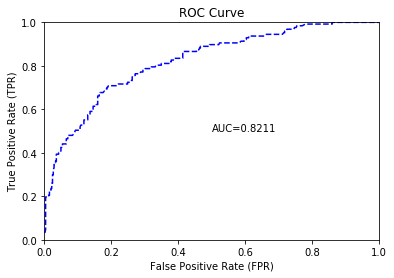

drf prediction progress: |████████████████████████████████████████████████| 100%


In [19]:
rf_model, rf_predict = predict_with_H2ORandomForest(predictors_data, response_data, train_data, valid_data)

stackedensemble Model Build progress: |███████████████████████████████████| 100%

ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.13179450299390855
RMSE: 0.3630351263912468
LogLoss: 0.4194871955952109
Null degrees of freedom: 563
Residual degrees of freedom: 561
Null deviance: 659.817025211836
Residual deviance: 473.1815566313979
AIC: 479.1815566313979
AUC: 0.8275013964215571
AUCPR: 0.6549458704447656
Gini: 0.6550027928431141

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3858205943441707: 


,,0,1,Error,Rate
0,0,371.0,66.0,0.151,(66.0/437.0)
1,1,44.0,83.0,0.3465,(44.0/127.0)
2,Total,415.0,149.0,0.195,(110.0/564.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.385821,0.601449,131.0
1,max f2,0.159889,0.698529,267.0
2,max f0point5,0.751849,0.680000,48.0
3,max accuracy,0.751849,0.845745,48.0
4,max precision,0.900668,1.000000,0.0
5,max recall,0.092821,1.000000,382.0
6,max specificity,0.900668,1.000000,0.0
7,max absolute_mcc,0.751849,0.502630,48.0
8,max min_per_class_accuracy,0.260258,0.740157,182.0
9,max mean_per_class_accuracy,0.385821,0.751257,131.0



Gains/Lift Table: Avg response rate: 22.52 %, avg score: 30.07 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010638,0.898976,4.440945,4.440945,1.000000,0.900000,1.000000,0.900000,0.047244,0.047244,344.094488,344.094488,0.047244
1,2,0.021277,0.897551,4.440945,4.440945,1.000000,0.898559,1.000000,0.899280,0.047244,0.094488,344.094488,344.094488,0.094488
2,3,0.030142,0.889825,2.664567,3.918481,0.600000,0.895338,0.882353,0.898120,0.023622,0.118110,166.456693,291.848078,0.113534
3,4,0.040780,0.887338,4.440945,4.054776,1.000000,0.888325,0.913043,0.895565,0.047244,0.165354,344.094488,305.477576,0.160778
4,5,0.051418,0.864207,3.700787,3.981537,0.833333,0.879307,0.896552,0.892201,0.039370,0.204724,270.078740,298.153679,0.197859
5,6,0.101064,0.777254,3.330709,3.661832,0.750000,0.819114,0.824561,0.856299,0.165354,0.370079,233.070866,266.183174,0.347195
6,7,0.150709,0.687005,2.061867,3.134785,0.464286,0.729403,0.705882,0.814498,0.102362,0.472441,106.186727,213.478462,0.415233
7,8,0.200355,0.534495,1.268841,2.672427,0.285714,0.598345,0.601770,0.760938,0.062992,0.535433,26.884139,167.242701,0.432458
8,9,0.299645,0.315560,1.427447,2.259889,0.321429,0.417831,0.508876,0.647246,0.141732,0.677165,42.744657,125.988911,0.487234
9,10,0.400709,0.236606,0.857024,1.906069,0.192982,0.275839,0.429204,0.553572,0.086614,0.763780,-14.297555,90.606926,0.468585


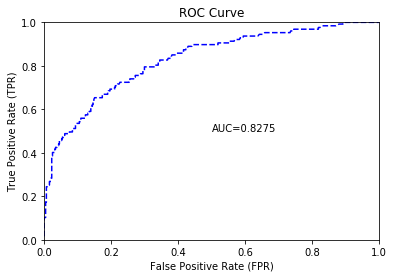

stackedensemble prediction progress: |████████████████████████████████████| 100%


In [20]:
baseModels =[gbm_model, rf_model]
ensemble_model, ensemble_prediction = predict_with_H2OStackedEnsemble(predictors_data, response_data, train_data, valid_data, baseModels)


In [21]:
H2O_Model_Data["GBM_Prediction"]  = gbm_predict['predict'].as_data_frame().values.flatten()
H2O_Model_Data["RF_Prediction"]  = rf_predict['predict'].as_data_frame().values.flatten()
H2O_Model_Data["Ensemble_Prediction"]  = ensemble_prediction['predict'].as_data_frame().values.flatten()

In [22]:
def write_predictions_to_csv(dataToWrite, file):
    fullAttrList = dataToWrite.keys()
    dfToWrite = pd.DataFrame( columns = fullAttrList)
    for key,val in dataToWrite.items():
        dfToWrite[key] = val
    dfToWrite.to_csv(file, index=False) 
    return dfToWrite

In [23]:
write_predictions_to_csv(H2O_Model_Data, data_folder+"/output_files/4-GR-29-Capstone_Customer_Retail_Analytics_H2o__predictions.csv")

,CustomerID,LTVCluster_binary,GBM_Prediction,RF_Prediction,Ensemble_Prediction
0,13167.0,0,0,0,0
1,14732.0,0,0,1,1
2,15182.0,0,0,0,0
3,15301.0,1,1,1,1
4,17652.0,1,1,1,1
...,...,...,...,...,...
559,16239.0,0,0,0,0
560,16005.0,0,0,0,0
561,16014.0,0,0,0,0
562,12910.0,1,0,0,0


In [24]:
print('\n\n*************************************************************************************')
for key,val in Model_accuracy.items():
  print(f'Model: {key}  Accuracy: {val}')
  print('\n\n*************************************************************************************')   



*************************************************************************************
Model: H2OGradientBoostingEstimator  Accuracy: 0.8283392493558442


*************************************************************************************
Model: H2ORandomForestEstimator  Accuracy: 0.8210688480873529


*************************************************************************************
Model: H2OStackedEnsembleEstimator  Accuracy: 0.8275013964215571


*************************************************************************************


In [25]:
#Shutting Down
h2o.cluster().shutdown()